In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Modelo SEIR
En una población en la que se ha desatado una epidemia, en un 
determinado tiempo $t$ los individuos pueden estar en cuatro 
estados distintos:

- Susceptibles $S(t)$: Se pueden infectar (no están enfermos ni son inmunes) cuando 
entran en contacto con contagiados. La tasa de infección se controla mediante el parámetro
$\beta$, que depende de si la enfermedad es más o menos infecciosa.

- Expuestos $E(t)$: Son individuos que portan la enfermedad en periodo de incubación.
No muestran síntomas y no pueden contagiar a nadie. Cuando transcurre el periodo de 
incubación pasan al grupo de infectados. El parámetro $\sigma$ representa el tiempo 
de incubación

- Infectados $I(t)$: Individuos infectados en el instante $t$. Se *recuperan*
 con el tiempo según un parámetro $\gamma$ denominado tasa de recuperación, y
 que depende del tiempo que suele durar la enfermedad. Una vez recuperados, 
 los individuos no afectan al desarrollo de la epidemia (son inmunes o 
 han muerto)
 
- Recuperados $R(t)$: Individuos que han pasado la enfermedad y se han 
inmunizado o han fallecido. En cualquier caso, no afectan a la propagación.

En cualquier momento $t$, la suma de los individuos que se encuentran en cualquiera 
de los 4 estados posibles será igual a la población total:

$S(t) + E(t) + I(t) + R(t) = N$


## Ejemplo de aplicación a la CCVV

En primer lugar vamos a definir una función para general los gráficos:

In [2]:
def plot_seir(data, features, title):
    for feature in features:
        plt.plot(data[feature], label=feature)
    plt.legend()
    plt.suptitle(title)
    plt.show()


### Ejemplo con el modelo simple

Ahora definimos los parámetros iniciales:


In [3]:
beta = 1           # Tasa de transmisión, probabilidad de que un susceptible se infecte al entrar en contacto con un infectado.
gamma = 1 / 5      # Tasa de recuperación, su inversa es el tiempo medio de recuperación.
sigma = 1 / 7      # Tasa de incubación, su inversa es el tiempo promedio de incubación.
St0 = N = 5003769  # N Población total, en este caso, de la CCVV
Et0 = 0            # Número de expuestos iniciales
It0 = 1            # Número de infectados iniciales
Rt0 = 0            # Número de recuperados iniciales

Una vez definidos los parámetros, simulamos una epidemia durante 150 días:

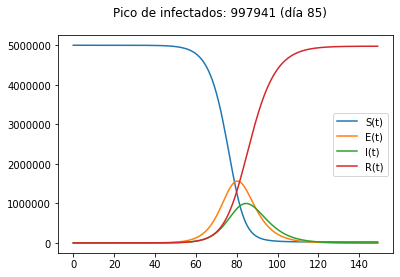

In [4]:
St = St0
Et = Et0
It = It0
Rt = Rt0
days = 150
model_evolution = np.zeros((days, 4))
for day in range(days):
    dS = -(beta * St * It) / N
    dE = (beta * St * It) / N - (sigma * Et)
    dI = (sigma * Et) - (gamma * It)
    dR = (gamma * It)
    St += dS
    Et += dE
    It += dI
    Rt += dR
    model_evolution[day] = [St, Et, It, Rt]

max_infected = np.argmax(model_evolution[:, 2])
title = f'Pico de infectados: {int(model_evolution[max_infected, 2])} (día {max_infected})'
df = pd.DataFrame(model_evolution, columns=['S(t)', 'E(t)', 'I(t)', 'R(t)'])
plot_seir(data=df, features=['S(t)', 'E(t)', 'I(t)', 'R(t)'], title=title)

### Ejemplo con confinación

El parámetro $\beta$ se puede ajustar artificialmente si se toman medidas de contención 
(protección y aislamiento), y si la población las cumple. Un modelo sencillo seria:

$\beta(t) = \beta_0(t)(1-\alpha(t))(1 - \frac{D(t)}{N})^{\kappa}$

donde:

- $\beta_0$ es la tasa de infección si no se toman medidas

- $\alpha(t)$ es el resultado de las acciones gubernamentales. Es una función constante 
a trozos, con valores en el intervalo $[0, 1]$, puesto que las acciones se toman en 
momentos concretos.

- $D(t)$ representa la sensación pública de riesgo.

- $\kappa$ mide la intensidad de la reacción de la población. Un valor elevado implica mucha
preocupación entre la población.

Si, como ejemplo, consideramos que aproximadamente, como sucede con el COVID-19, el 5% de
los casos se consideran graves, podemos tomar $D(t) = 0.05I(t)$, y un valor de $\kappa = 100$,
que representaría una preocupación moderada. Si consideramos que se han tomado medidas desde 
un principio, con $\alpha(t) = 0.5$:

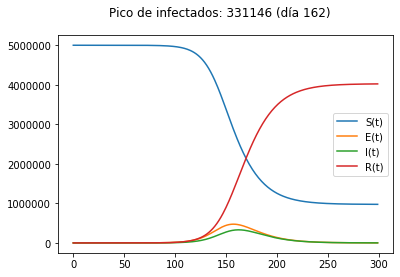

In [5]:
St = St0
Et = Et0
It = It0
Rt = Rt0
betat = beta
alpha0 = 0.5
k = 100
days = 300
model_evolution = np.zeros((days, 4))
for day in range(days):
    dS = -(betat * St * It) / N
    dE = (betat * St * It) / N - (sigma * Et)
    dI = (sigma * Et) - (gamma * It)
    dR = (gamma * It)
    betat = beta * (1 - alpha0) * (1 - 0.05 * It / N) ** k
    St += dS
    Et += dE
    It += dI
    Rt += dR
    model_evolution[day] = [St, Et, It, Rt]

max_infected = np.argmax(model_evolution[:, 2])
title = f'Pico de infectados: {int(model_evolution[max_infected, 2])} (día {max_infected})'
df = pd.DataFrame(model_evolution, columns=['S(t)', 'E(t)', 'I(t)', 'R(t)'])
plot_seir(data=df, features=['S(t)', 'E(t)', 'I(t)', 'R(t)'], title=title)


vemos que la epidemia es mucho mas moderado que antes, no toda la población se infecta, y el pico ocurre varios días más tarde.